# **Environment Setup**

In [1]:
#Import libraries needed for the pipeline
import pandas as pd # Needed for data loading and processing
import numpy as np # Needed for calculating statistical metrics e.g., mean. medain, etc.
import matplotlib.pyplot as plt # Needed for creating visualisation
import seaborn as sns # Needed for creating visualisation
import math # Needed for calculating statistical metrics (mainly for identifying outliers)

# **Dataset Overview**

In [2]:
# Load dataset
try:
    dataset_path = "D:\Python\projects\Full Stack Data Analysis\A1_Data.xlsx"
    df = pd.read_excel(dataset_path)
    print("Dataset loaded")
except FileNotFoundError:
    print("File not found")
except Exception as e:
    print("Error occurred, please check!:", e)

<>:3: SyntaxWarning: invalid escape sequence '\P'
<>:3: SyntaxWarning: invalid escape sequence '\P'
C:\Users\UserPC\AppData\Local\Temp\ipykernel_20252\4154541744.py:3: SyntaxWarning: invalid escape sequence '\P'
  dataset_path = "D:\Python\projects\Full Stack Data Analysis\A1_Data.xlsx"


Dataset loaded


In [3]:
#Basic information of the dataset
#Dataset shape
print("Shape of dataset: \n", df.shape)
#Dataset datatype
print(df.dtypes)
display(df.head(5))

Shape of dataset: 
 (28509, 20)
Unnamed: 0.1                            int64
Unnamed: 0                              int64
address                                object
number_of_beds                          int64
number_of_baths                         int64
number_of_parks                         int64
property_size                         float64
listed_date                    datetime64[ns]
sold_date                      datetime64[ns]
property_classification                object
property_sub_classification            object
suburb                                 object
state                                  object
postcode                                int64
description                            object
average_days_on_market                float64
average_median_price                  float64
days_on_market                         object
sold_price                              int64
listed_price                          float64
dtype: object


,Unnamed: 0.1,Unnamed: 0,address,number_of_beds,number_of_baths,number_of_parks,property_size,listed_date,sold_date,property_classification,property_sub_classification,suburb,state,postcode,description,average_days_on_market,average_median_price,days_on_market,sold_price,listed_price
0,0,0,"11 Konrad Place, SINNAMON PARK QLD 4073",5,2,2,720.0,NaT,2022-03-01,House,House,SINNAMON PARK,QLD,4073,NaN,27.0,1305000.0,High,1444000,NaN
1,1,1,"3/4 Kates Street, MORNINGSIDE QLD 4170",3,2,2,NaN,2022-07-13,2022-07-26,House,Townhouse,MORNINGSIDE,QLD,4170,Contemporary comfort in premier boutique compl...,26.0,985000.0,Low,884971,NaN
2,2,2,"2 Pine Street, RUNCORN QLD 4113",4,2,3,547.0,2022-03-24,2022-04-10,House,House,RUNCORN,QLD,4113,"HUGE, MODERN FAMILY HOME | DESIRABLE NORTH - S...",18.0,875000.0,Low,1010000,NaN
3,3,3,"10/15 Childs Street, CLAYFIELD QLD 4011",2,2,1,NaN,2022-03-24,2022-03-30,Unit,Apartment / Unit / Flat,CLAYFIELD,QLD,4011,Living Among the Tree Tops! Enjoy the cooling ...,27.0,440000.0,Low,500000,475000.0
4,4,4,"16 Remick Street, STAFFORD HEIGHTS QLD 4053",4,2,2,620.0,2022-07-07,2022-07-30,House,House,STAFFORD HEIGHTS,QLD,4053,UNDER CONTRACT! UNDER CONTRACT! North facing r...,36.0,1068000.0,Low,1250000,NaN


# **Data Cleaning**


**Remove Irrelevant Attributes**

In [4]:
##Remove columns irrelevant to the analysis
#Remove indexes (i.e., Unnamed: 0.1 & Unnamed: 0)
df = df.drop(columns=df.columns[[0, 1]])

#Remove address (redundant)
df = df.drop('address', axis=1)

#Remove listed date, sold date, and average days on market
df = df.drop('listed_date', axis=1)
df = df.drop('sold_date', axis=1)
df = df.drop('average_days_on_market', axis=1)

#Remove property sub classification (redundant)
df = df.drop('property_sub_classification', axis=1)

#Remove state (redundant)
df = df.drop('state', axis=1)

#Remove description (difficult to visualise)
df = df.drop('description', axis=1)

#Remove suburb (redundant)
df = df.drop('suburb', axis = 1)

print("Shape of dataset after removing irrelevant columns: \n", df.shape)

Shape of dataset after removing irrelevant columns: 
 (28509, 10)


**Adjust datatype**

In [5]:
#Transform datatype of postcode to object and sold price to float
df['postcode'] = df['postcode'].astype(str)
df['sold_price'] = df['sold_price'].astype(float)

#Display data types after transformation
print(df.dtypes)

number_of_beds               int64
number_of_baths              int64
number_of_parks              int64
property_size              float64
property_classification     object
postcode                    object
average_median_price       float64
days_on_market              object
sold_price                 float64
listed_price               float64
dtype: object


**NULL value imputation**


In [6]:
#Display columns with missing data
print(df.isna().sum())

number_of_beds                 0
number_of_baths                0
number_of_parks                0
property_size               8432
property_classification        0
postcode                       0
average_median_price         459
days_on_market                 0
sold_price                     0
listed_price               20901
dtype: int64


In [7]:
## Replace null values in property size by the median value of the property's classification
df['property_size'] = df.groupby('property_classification')['property_size'].transform(lambda x: x.fillna(x.median()))
## Remove listed_price due to too many missing values
df = df.drop('listed_price', axis=1)
## Remove remaining rows with missing values
df = df.dropna()
print("Information of the dataset after removing null values: \n")
print(df.isna().sum())
print(df.shape)

Information of the dataset after removing null values: 

number_of_beds             0
number_of_baths            0
number_of_parks            0
property_size              0
property_classification    0
postcode                   0
average_median_price       0
days_on_market             0
sold_price                 0
dtype: int64
(28050, 9)


**Identify and remove outliers**

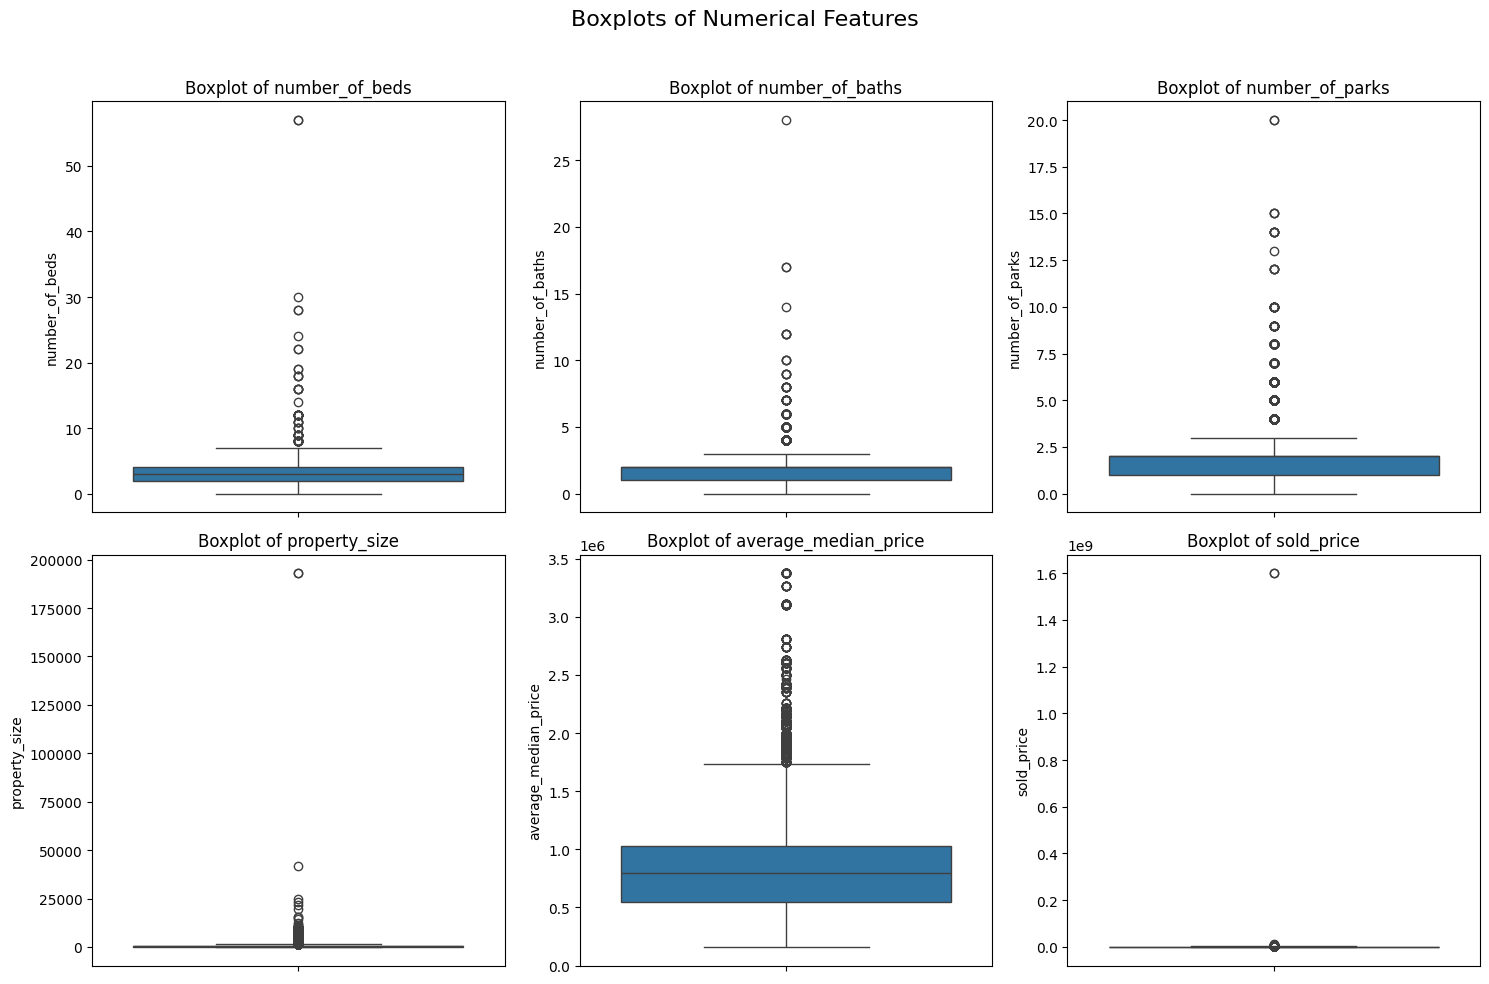

In [8]:
## Plot boxplots and histograms for numerical columns

# Grid size (rows, cols) depending on number of numerical columns
num_cols = df.select_dtypes(include='number').dropna(how='any')


n_cols = len(num_cols.columns)
n_rows = math.ceil(n_cols / 3) # Calculate number of rows needed

fig, axes = plt.subplots(n_rows, 3, figsize=(15, n_rows * 5)) # Adjust figure size based on number of rows

# Flatten the axes array for easy iteration
axes = axes.flatten()

for i, col in enumerate(num_cols.columns):
  # Boxplot
  sns.boxplot(y=num_cols[col], ax=axes[i])
  axes[i].set_title(f'Boxplot of {col}', fontsize=12)
  axes[i].set_ylabel(col)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("Boxplots of Numerical Features", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()



In [9]:
## Identify and remove outliers
def remove_outliers_by_group(df, group_col, cols_to_check):
  df_cleaned = pd.DataFrame()
  for _, group_df in df.groupby(group_col):
    for col in cols_to_check:
      Q1 = group_df[col].quantile(0.25)
      Q3 = group_df[col].quantile(0.75)
      IQR = Q3 - Q1
      lower_bound = Q1 - 1.5 * IQR
      upper_bound = Q3 + 1.5 * IQR
      group_df = group_df[(group_df[col] >= lower_bound) & (group_df[col] <= upper_bound)]
    df_cleaned = pd.concat([df_cleaned, group_df])
  return df_cleaned

# Specify columns to check for outliers
cols_to_check = ['number_of_beds', 'number_of_baths', 'number_of_parks', 'property_size']

# Remove outliers based on property classification
df = remove_outliers_by_group(df, 'property_classification', cols_to_check)

#Due to sold_price being highly scewed, it requires a different set of outlier removal procedure
lower = df['sold_price'].quantile(0.01)
df = df[(df['sold_price'] >= lower)]


print("Shape of dataset after removing outliers: \n", df.shape)
df.info()

Shape of dataset after removing outliers: 
 (19683, 9)
<class 'pandas.core.frame.DataFrame'>
Index: 19683 entries, 0 to 28506
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   number_of_beds           19683 non-null  int64  
 1   number_of_baths          19683 non-null  int64  
 2   number_of_parks          19683 non-null  int64  
 3   property_size            19683 non-null  float64
 4   property_classification  19683 non-null  object 
 5   postcode                 19683 non-null  object 
 6   average_median_price     19683 non-null  float64
 7   days_on_market           19683 non-null  object 
 8   sold_price               19683 non-null  float64
dtypes: float64(3), int64(3), object(3)
memory usage: 1.5+ MB


In [10]:
#Binarize target variable days_on_market
df['days_on_market'] = df['days_on_market'].map({'Low': 1, 'High': 0})

# **Data Visualisation**

**Visualisation 1 - How does the number of bedrooms and bathrooms together affect the sold price?**

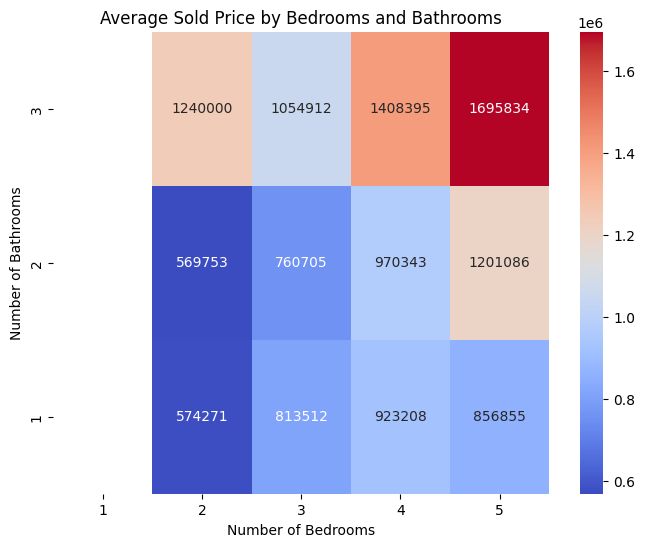

In [148]:
# Pivot table for average price
heatmap_data = df.pivot_table(
    index='number_of_baths',
    columns='number_of_beds',
    values='sold_price',
    aggfunc='mean'
)

# Reindex to ensure full range of values from 1 to max
beds_range = range(1, df['number_of_beds'].max() + 1)
baths_range = range(df['number_of_baths'].max(),0,-1)
heatmap_data = heatmap_data.reindex(index=baths_range, columns=beds_range)

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap='coolwarm')
plt.title('Average Sold Price by Bedrooms and Bathrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Number of Bathrooms')
plt.show()

**Visualisation 2 - Which postcodes has the most property sales between Feb 2022 - Feb 2023?**

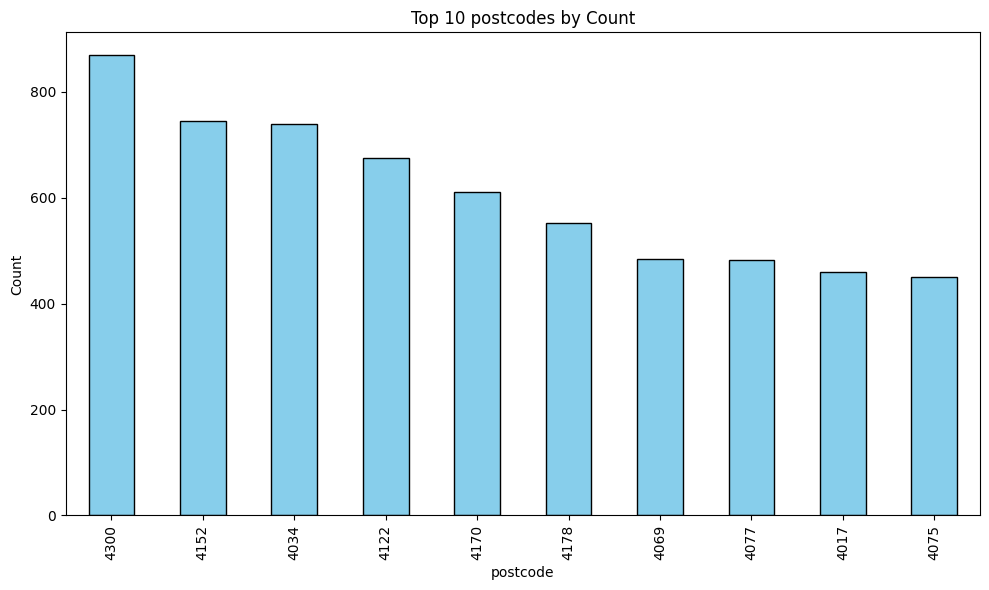

In [149]:
while True:
  try:
    top_n = int(input("Enter the number of top postcodes to visualise (e.g., 5): "))
    suburb_counts = df['postcode'].value_counts()
    top_suburbs = suburb_counts[:top_n]


    fig, ax = plt.subplots(1,1,figsize=(10,6))

    # Top suburbs
    top_suburbs.plot(kind="bar", ax=ax, color="skyblue", edgecolor="black")
    ax.set_title("Top "+str(top_n)+" postcodes by Count")
    ax.set_ylabel("Count")

    plt.tight_layout()
    plt.show()
    break
  except(ValueError):
    print("Invalid Input, please only enter integers.")


**Visualisation 3 - Do areas (postcodes) with higher average median prices have shorter days on market?**


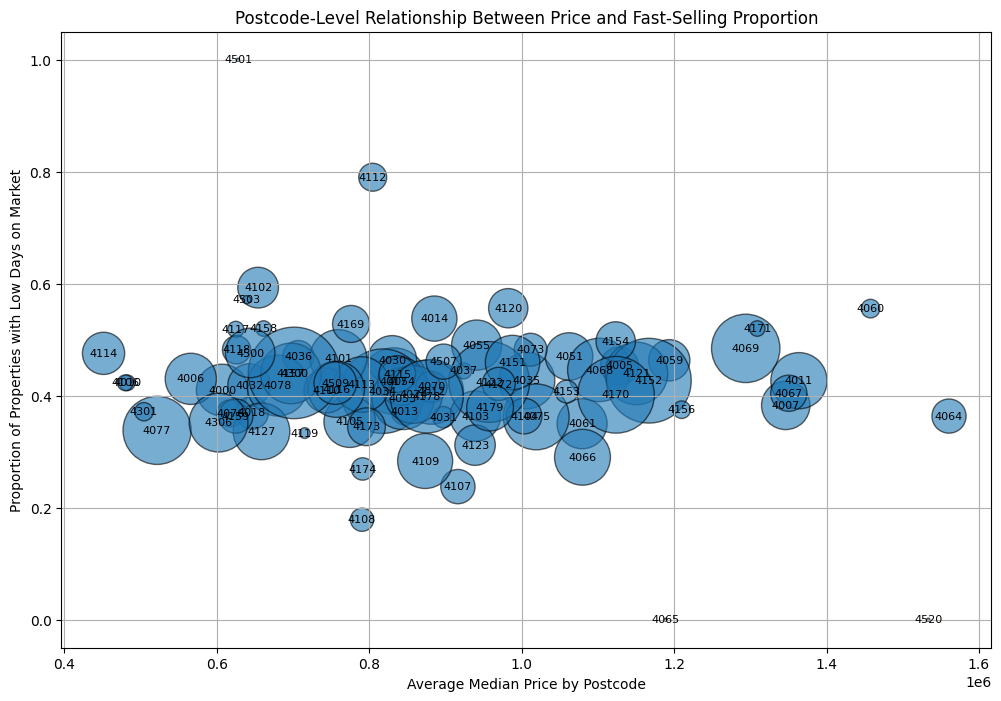

In [150]:
# Filter the relevant columns
df_to_visualise = df[['postcode', 'average_median_price', 'days_on_market']].copy()

# Ensure days_on_market is numeric if it's stored as string
df_to_visualise['days_on_market'] = pd.to_numeric(df_to_visualise['days_on_market'], errors='coerce')

# Aggregate by postcode
bubble_data = df_to_visualise.groupby('postcode').agg(
    avg_price=('average_median_price', 'mean'),
    prop_low=('days_on_market', lambda x: (x == 0).mean()),  # proportion of low days_on_market
    total_listings=('days_on_market', 'count')                # for bubble size
).reset_index()

#Create bubble plot
plt.figure(figsize=(12,8))

# Bubble scatter plot
plt.scatter(
    bubble_data['avg_price'],
    bubble_data['prop_low'],
    s=bubble_data['total_listings'] * 5,   # use total listings for bubble size
    alpha=0.6,
    edgecolors='black'
)

# Label each bubble with postcode
for i, row in bubble_data.iterrows():
    plt.text(row['avg_price'], row['prop_low'], str(row['postcode']),
             fontsize=8, ha='center', va='center')

# Add titles and labels
plt.xlabel("Average Median Price by Postcode")
plt.ylabel("Proportion of Properties with Low Days on Market")
plt.title("Postcode-Level Relationship Between Price and Fast-Selling Proportion")
plt.grid(True)
plt.show()

**Visualisation 4 - Is there a relationship between property size and days on market, and does this vary by property classification?**

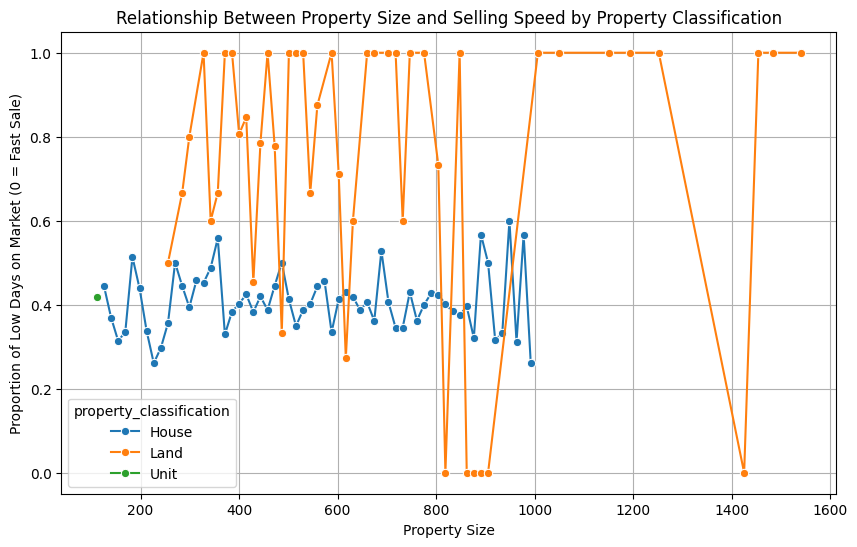

In [151]:
# Filter the relevant columns
df_to_visualise = df[['property_size','property_classification','days_on_market']].copy()

#Create bins for property size
df_to_visualise['size_bin'] = pd.cut(df_to_visualise['property_size'], bins=100)

#Compute the proportion of low days_on_market for each bin and property classification
# Convert days_on_market to numeric if needed
df_to_visualise['days_on_market'] = pd.to_numeric(df_to_visualise['days_on_market'], errors='coerce')

# Group and aggregate
prop_data = df_to_visualise.groupby(['property_classification', 'size_bin'], observed=True).agg(
    prop_low=('days_on_market', lambda x: (x == 0).mean())
).reset_index()

# Get bin midpoints for the x-axis
prop_data['size_mid'] = prop_data['size_bin'].apply(lambda x: x.mid)


plt.figure(figsize=(10,6))
sns.lineplot(
    data=prop_data,
    x='size_mid',
    y='prop_low',
    hue='property_classification',
    marker='o'
)

plt.xlabel("Property Size")
plt.ylabel("Proportion of Low Days on Market (0 = Fast Sale)")
plt.title("Relationship Between Property Size and Selling Speed by Property Classification")
plt.grid(True)
plt.show()

**Visualisation 5 - What factors (beds, baths, size, parks) are most strongly correlated with sold price?**

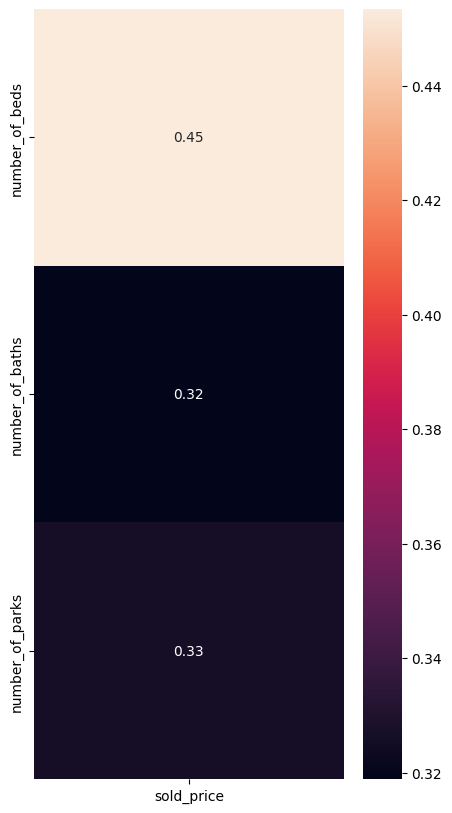

In [152]:
df_to_visualise = df[['number_of_beds','number_of_baths','number_of_parks','sold_price']]
cat_cols = [col for col in df_to_visualise.columns if 'sold_price' in col]
not_cat_cols = [col for col in df_to_visualise.columns if 'sold_price' not in col]

targ_corr = df_to_visualise.corr()
plt.figure(figsize=(5, 10))
ax = sns.heatmap(targ_corr.loc[not_cat_cols, cat_cols], annot=True)
plt.show()

**Visualisation 6 - What is the correlation between the numeric attributes?**

<Axes: >

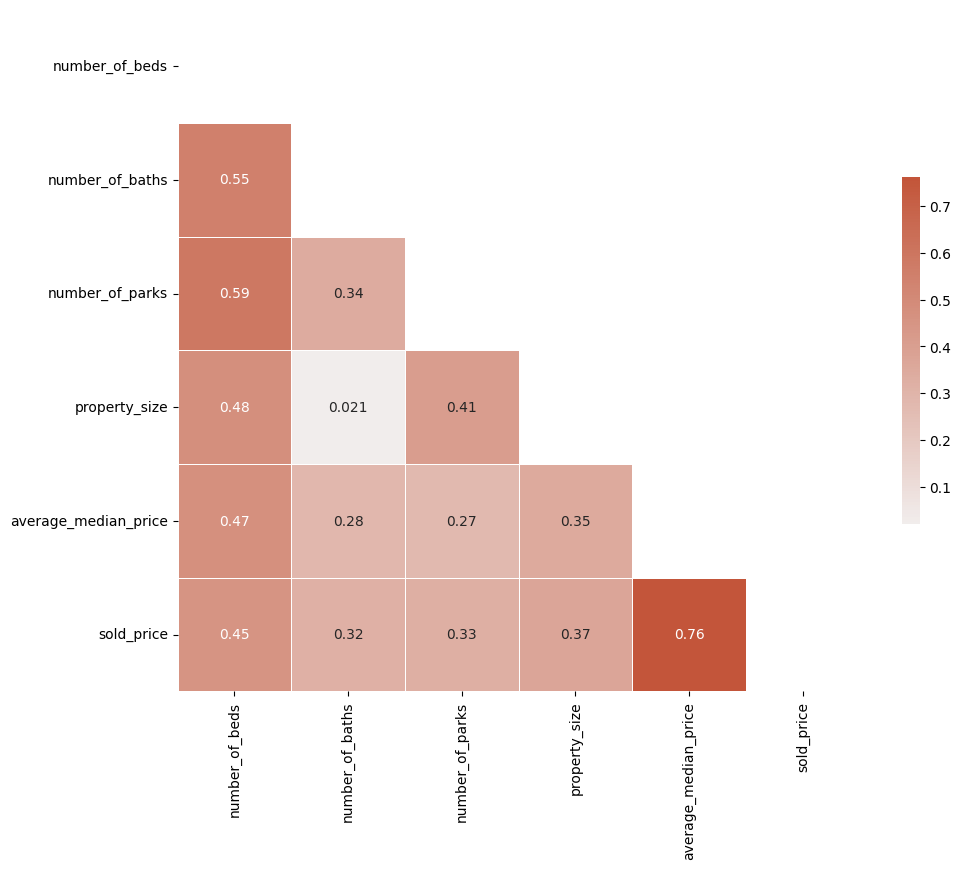

In [153]:
# Remove 'days_on_market' as it's not a numerical column for this correlation
num_cols = df.select_dtypes(include= 'number')
num_cols = num_cols.drop('days_on_market', axis=1)

#Compute correlation matrix
corr = num_cols.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot = True)

In [154]:
#Encode suburb and property_classification using label encoder
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['postcode'] = le.fit_transform(df['postcode'])
df['property_classification'] = le.fit_transform(df['property_classification'])


# **Model Biulding (Decision Tree)**

In [11]:
#Calculate Gini impurity
def gini_impurity(y):
  classes, counts = np.unique(y, return_counts=True)
  probs = counts / counts.sum()
  return 1 - np.sum(probs**2)
#Calculate Entropy
def entropy(y):
  classes, counts = np.unique(y, return_counts=True)
  probs = counts / counts.sum()
  return -np.sum([p * np.log2(p) for p in probs if p > 0])

#Find the best feature and threshold to split data with random feature selection
def best_split(X,y, criterion='gini', n_features=None):
  best_feature, best_thresh, best_gain = None, None, -1

  #Choose imprurity function
  if criterion == 'gini':
    impurity_func = gini_impurity
  elif criterion == 'entropy':
    impurity_func = entropy
  else:
    raise ValueError("Unknown criterion")

  parent_impurity = impurity_func(y)
  n_total_features = X.shape[1]
  if n_features is None:
      n_features = n_total_features
  # Randomly select a subset of features
  feature_indices = np.random.choice(n_total_features, size=min(n_features, n_total_features), replace=False)

  for feature in feature_indices:
    thresholds = np.unique(X[:,feature])
    for t in thresholds:
      left_idx = X[:,feature] <= t
      right_idx = ~left_idx
      if left_idx.sum() == 0 or right_idx.sum() ==0:
        continue

      #Weighted impurity
      n = len(y)
      left_imp = impurity_func(y[left_idx])
      right_imp = impurity_func(y[right_idx])
      child_impurity = (left_idx.sum()/n)*left_imp + (right_idx.sum()/n)*right_imp

      #Informatio gain
      gain = parent_impurity - child_impurity
      if gain > best_gain:
        best_feature, best_thresh, best_gain = feature, t, gain
  return best_feature, best_thresh, best_gain

#Biuld the tree
class Node:
  def __init__(self, feature=None, threshold=None, left=None, right=None, *, value=None):
    self.feature = feature
    self.threshold = threshold
    self.left = left
    self.right = right
    self.value = value

def build_tree(X, y, depth=0, max_depth=5, min_samples=2, criterion='gini', n_features=None):
  #stopping conditions
  if (depth >= max_depth) or (len(y)<min_samples) or (len(set(y))==1):
    #leaf node
    values, counts = np.unique(y, return_counts = True)
    return Node(value=values[np.argmax(counts)])

  feature, threshold, gain = best_split(X, y, criterion=criterion, n_features=n_features)
  if feature is None or gain ==0:
    values, counts, = np.unique(y,return_counts=True)
    return Node(value=values[np.argmax(counts)])

  left_idx = X[:, feature] <= threshold
  right_idx = ~left_idx

  left_node = build_tree(X[left_idx],y[left_idx],depth+1,max_depth,min_samples,criterion=criterion, n_features=n_features)
  right_node = build_tree(X[right_idx],y[right_idx],depth+1,max_depth,min_samples,criterion=criterion, n_features=n_features)
  return Node(feature,threshold,left_node,right_node)

#Prediction
def predict_single(node, X):
  if node.value is not None:
    return node.value
  if X[node.feature] <= node.threshold:
    return predict_single(node.left, X)
  else:
    return predict_single(node.right, X)

def predict(tree, X):
  return np.array([predict_single(tree, sample) for sample in X])

# **Train/Test(Decision Tree)**

In [12]:
from sklearn.model_selection import train_test_split
X = df.drop('days_on_market', axis=1)
y = df['days_on_market']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=25205129)

print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)
print("y_train: ", y_train.shape)
print("y_test: ", y_test.shape)

X_train:  (13187, 8)
X_test:  (6496, 8)
y_train:  (13187,)
y_test:  (6496,)


In [12]:
#initial performance testing
tree = build_tree(X_train.values, y_train.values, max_depth=5, criterion ='gini')
y_pred = predict(tree, X_test.values)

accuracy = np.mean(y_pred == y_test)
print("Decision Tree Accuracy:", accuracy)

Decision Tree Accuracy: 0.5871232580749703


In [158]:
from sklearn.metrics import accuracy_score
#Hyper parameter tuning using grid search
criteria = ['gini','entropy']
max_depths = [3, 5, 7, 10, 15, 20]
min_samples = [2, 5, 10]
results = []

for crit in criteria:
  for max_dep in max_depths:
    for min_sam in min_samples:
      tree = build_tree(X_train.values, y_train.values,
                        max_depth=max_dep,
                        min_samples = min_sam,
                        criterion = crit
                        )
      y_pred = predict(tree, X_test.values)
      acc = accuracy_score(y_test.values, y_pred)
      results.append({
          'criterion':crit,
          'max_depth':max_dep,
          'min_samples':min_sam,
          'accuracy':acc
      })

results_df = pd.DataFrame(results)
print(results_df.sort_values("accuracy", ascending=False))

   criterion  max_depth  min_samples  accuracy
15      gini         20            2  0.722906
33   entropy         20            2  0.707666
16      gini         20            5  0.694427
34   entropy         20            5  0.693042
17      gini         20           10  0.670874
35   entropy         20           10  0.666872
12      gini         15            2  0.660252
13      gini         15            5  0.648707
30   entropy         15            2  0.646860
31   entropy         15            5  0.639778
14      gini         15           10  0.639009
32   entropy         15           10  0.635006
9       gini         10            2  0.614224
10      gini         10            5  0.612531
11      gini         10           10  0.610991
28   entropy         10            5  0.604372
27   entropy         10            2  0.604218
29   entropy         10           10  0.602986
6       gini          7            2  0.599446
8       gini          7           10  0.599292
7       gini 

# **Ensemble Methods**

**Bootstrap Aggregating (Bagging)**

In [16]:
# Create Bootstrapped Samples
def create_bootstrapped_samples(X, y, n_samples):
  n_data = len(X)
  bootstrapped_samples = []
  for _ in range(n_samples):
    # Create random indices with replacement
    indices = np.random.choice(n_data, size=n_data, replace=True)
    X_sample = X[indices]
    y_sample = y[indices]
    bootstrapped_samples.append((X_sample, y_sample))
  return bootstrapped_samples

# Generate 50 bootstrapped samples 
n_estimators = 50
bootstrapped_train_data = create_bootstrapped_samples(X_train.values, y_train.values, n_estimators)

print(f"Generated {len(bootstrapped_train_data)} bootstrapped samples.")
print(f"Shape of the first bootstrapped sample X: {bootstrapped_train_data[0][0].shape}")
print(f"Shape of the first bootstrapped sample y: {bootstrapped_train_data[0][1].shape}")

Generated 50 bootstrapped samples.
Shape of the first bootstrapped sample X: (13187, 8)
Shape of the first bootstrapped sample y: (13187,)


In [160]:
# Train a decision tree on each bootstrapped sample
decision_trees = []
for X_sample, y_sample in bootstrapped_train_data:
  tree = build_tree(X_sample, y_sample, max_depth=20, min_samples=2, criterion='gini') # Using the best parameters from grid search
  decision_trees.append(tree)

print(f"Trained {len(decision_trees)} decision trees.")

Trained 50 decision trees.


In [161]:
# Make predictions with each tree
predictions = []
for tree in decision_trees:
  y_pred_tree = predict(tree, X_test.values)
  predictions.append(y_pred_tree)

# The 'predictions' list now contains a list of predictions from each tree
print(f"Generated predictions from {len(predictions)} trees.")
print(f"Shape of predictions from the first tree: {predictions[0].shape}")

Generated predictions from 50 trees.
Shape of predictions from the first tree: (6496,)


In [162]:
# Aggregate predictions using majority voting
predictions_array = np.array(predictions).T

# Now, for each sample, find the most frequent prediction (majority vote)
final_predictions = np.array([np.bincount(sample_predictions).argmax() for sample_predictions in predictions_array])

print("Shape of final predictions:", final_predictions.shape)

Shape of final predictions: (6496,)


In [163]:
# Evaluate the performance of the bagging model
accuracy_bagging = accuracy_score(y_test, final_predictions)
print("Bagging Decision Tree Accuracy:", accuracy_bagging)

Bagging Decision Tree Accuracy: 0.7655480295566502


**Random Forest**

In [13]:
from sklearn.metrics import accuracy_score
n_total_features = X_train.shape[1]
sqrt = int(np.sqrt(n_total_features))
log2 = int(np.log2(n_total_features))
#Hyper parameter tuning using grid search
criteria = ['gini','entropy']
max_depths = [3, 7, 15, 20]
min_samples = [2, 5, 10]
n_estimators = [sqrt, log2, n_total_features]
results = []


for crit in criteria:
  for max_dep in max_depths:
    for min_sam in min_samples:
      for n_est in n_estimators:
        tree = build_tree(X_train.values, y_train.values,
                            max_depth=max_dep,
                            min_samples = min_sam,
                            criterion = crit
                            , n_features = n_est
                            )
        y_pred = predict(tree, X_test.values)
        acc = accuracy_score(y_test.values, y_pred)
        results.append({
            'criterion':crit,
            'max_depth':max_dep,
            'min_samples':min_sam,
            'n_estimators':n_est,
            'accuracy':acc
        })

results_df = pd.DataFrame(results)
print(results_df.sort_values("accuracy", ascending=False))

   criterion  max_depth  min_samples  n_estimators  accuracy
29      gini         20            2             8  0.644269
64   entropy         20            2             3  0.639840
65   entropy         20            2             8  0.638112
32      gini         20            5             8  0.636059
31      gini         20            5             3  0.635411
..       ...        ...          ...           ...       ...
51   entropy          7           10             2  0.583990
9       gini          7            2             2  0.583558
43   entropy          3           10             3  0.581506
0       gini          3            2             2  0.580966
6       gini          3           10             2  0.580210

[72 rows x 5 columns]


In [17]:
#Generate 100 bootstrapped samples (you can adjust n_samples)
n_estimators = 100
bootstrapped_train_data = create_bootstrapped_samples(X_train.values, y_train.values, n_estimators)

print(f"Generated {len(bootstrapped_train_data)} bootstrapped samples.")
print(f"Shape of the first bootstrapped sample X: {bootstrapped_train_data[0][0].shape}")
print(f"Shape of the first bootstrapped sample y: {bootstrapped_train_data[0][1].shape}")

Generated 100 bootstrapped samples.
Shape of the first bootstrapped sample X: (13187, 8)
Shape of the first bootstrapped sample y: (13187,)


In [18]:
# Determine the number of features to consider per tree
n_total_features = X_train.shape[1]
n_features_per_tree = int(np.log2(n_total_features))

# Train a decision tree on each bootstrapped sample
random_forest_trees = []
for X_sample, y_sample in bootstrapped_train_data:
  tree = build_tree(X_sample, y_sample, max_depth=20, min_samples=2, criterion='entropy', n_features=n_features_per_tree) # Using the best parameters from grid search 
  random_forest_trees.append(tree)

print(f"Trained {len(random_forest_trees)} decision trees.")

Trained 100 decision trees.


In [19]:
# Make predictions with each tree
predictions = []
for tree in random_forest_trees:
  y_pred_tree = predict(tree, X_test.values)
  predictions.append(y_pred_tree)

# The 'predictions' list now contains a list of predictions from each tree
print(f"Generated predictions from {len(predictions)} trees.")
print(f"Shape of predictions from the first tree: {predictions[0].shape}")

Generated predictions from 100 trees.
Shape of predictions from the first tree: (6496,)


In [20]:
# Aggregate predictions using majority voting
# predictions is a list of arrays, where each array contains predictions from one tree
# We need to transpose this to have predictions for each sample across all trees
predictions_array = np.array(predictions).T

# Now, for each sample, find the most frequent prediction (majority vote)
final_predictions_rf = np.array([np.bincount(sample_predictions).argmax() for sample_predictions in predictions_array])

print("Shape of final Random Forest predictions:", final_predictions_rf.shape)

Shape of final Random Forest predictions: (6496,)


In [21]:
from sklearn.metrics import accuracy_score

# Evaluate the performance of the Random Forest model
accuracy_random_forest = accuracy_score(y_test, final_predictions_rf)
print("Random Forest Accuracy:", accuracy_random_forest)

Random Forest Accuracy: 0.7258312807881774
